In [2]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
import seaborn as sns

sys.path.append("../src")  # adjust path as needed
from read_Parkinsonpredict import ReadData

If throws an error, probably needs you to do 'conda install vtk' in the erodos_summer_2025' environment

### Data Analysis

#### Gene Expression Data

/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_93778/4202992618.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")


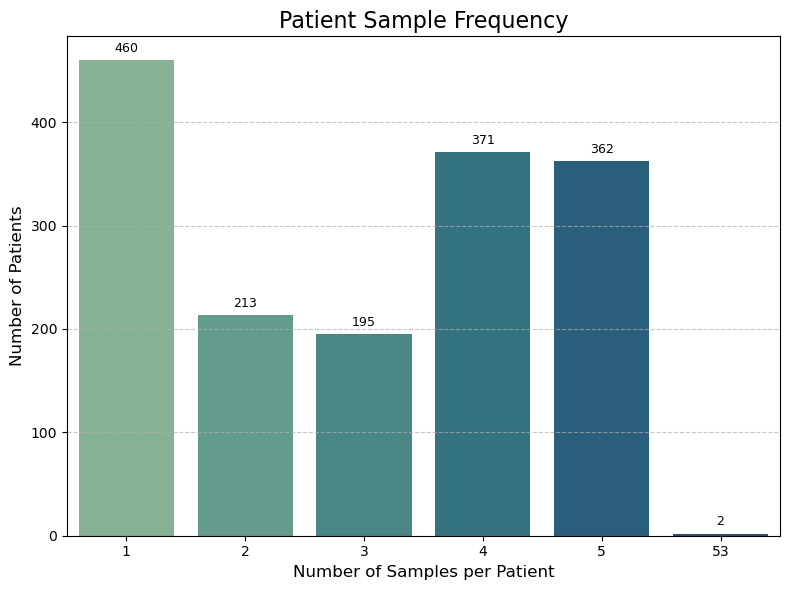

In [2]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Gene_expression'

df = pd.read_csv(path+'/metaDataIR3.csv')

# Count number of samples per patient
sample_counts = df['PATNO'].value_counts()

# Count how many patients fall into each sample count
counts_distribution = sample_counts.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")

plt.title("Patient Sample Frequency", fontsize=16)
plt.xlabel("Number of Samples per Patient", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add exact counts on top of bars
for i, val in enumerate(counts_distribution.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [3]:
sample_counts[sample_counts == 53]

PATNO
1009    53
1010    53
Name: count, dtype: int64

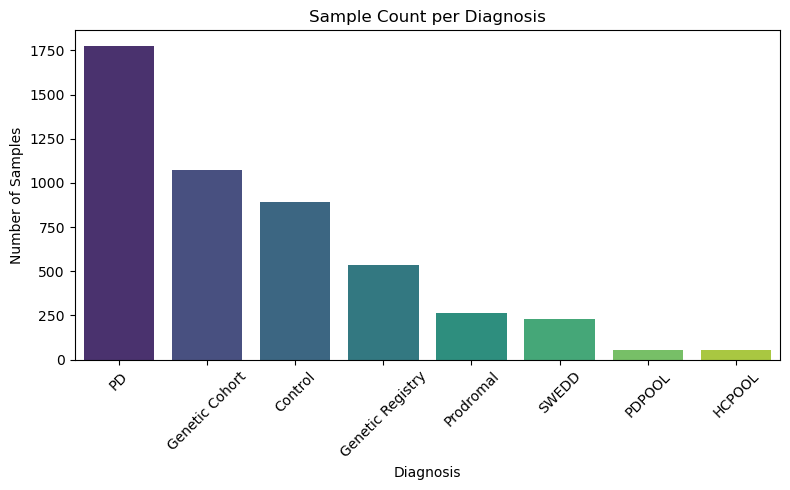

4871


In [4]:
# Load your metadata CSV
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Gene_expression'

df = pd.read_csv(path+'/metaDataIR3.csv')

# Count diagnosis occurrences
diagnosis_counts = df['DIAGNOSIS'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Diagnosis', y='Count', data=diagnosis_counts, hue='Diagnosis', palette='viridis')
plt.title('Sample Count per Diagnosis')
plt.ylabel('Number of Samples')
plt.xlabel('Diagnosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(len(df['DIAGNOSIS']))

##### From here on, we are only going to look into PD, Control and Prodromal

#### UPDRS_HYS Data

/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_93778/3469174605.py:3: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'/MDS-UPDRS_Part_III_03Jun2025.csv')
/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_93778/3469174605.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")


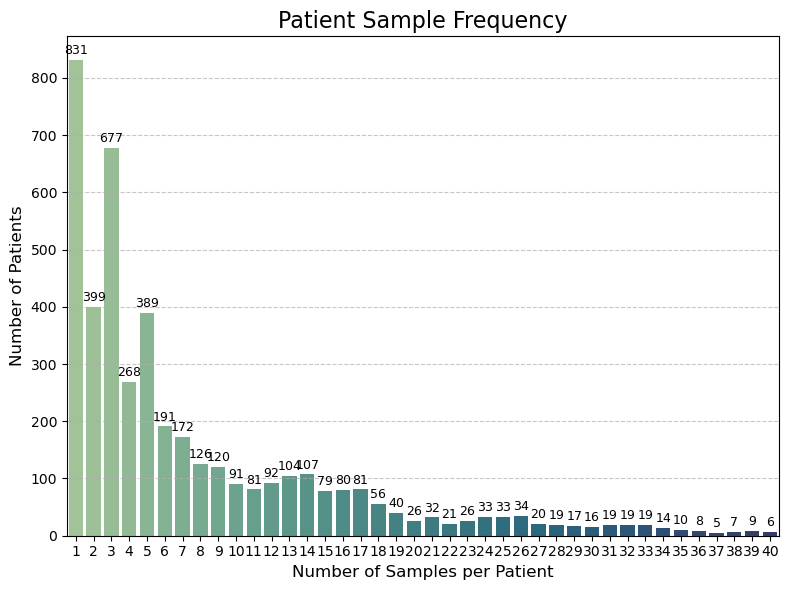

33258


In [5]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Diagnosis_History_UPDRS_HYS/'

df = pd.read_csv(path+'/MDS-UPDRS_Part_III_03Jun2025.csv')

# Count number of samples per patient
sample_counts = df['PATNO'].value_counts()

# Count how many patients fall into each sample count
counts_distribution = sample_counts.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")

plt.title("Patient Sample Frequency", fontsize=16)
plt.xlabel("Number of Samples per Patient", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add exact counts on top of bars
for i, val in enumerate(counts_distribution.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()
print(len(df['PATNO']))

### Filtering both the data sets based on PATNO and Event IDs

In [6]:
#instiantiate the reading class
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/'

input_path = path
output_path = path + 'fomatted_data'
data = ReadData(data_path=input_path, output_path=output_path, debugging=1)

genedata, hys = data.HYS_data_filtered()


HYS data shape: (33258, 63)
Gene metadata shape: (2927, 72)
Common PATNOs found: 3161
First few matched PATNOs: ['PATNO', 'EVENT_ID']
Matched gene samples: (3161, 73)
Matched HYS samples: (4007, 63)


/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/read_Parkinsonpredict.py:41: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HYS_data = pd.read_csv(HYS_data_path+"MDS-UPDRS_Part_III_03Jun2025.csv")


##### UPDRS_HYS Data set after Filtering

4007


/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_93778/3773997058.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")


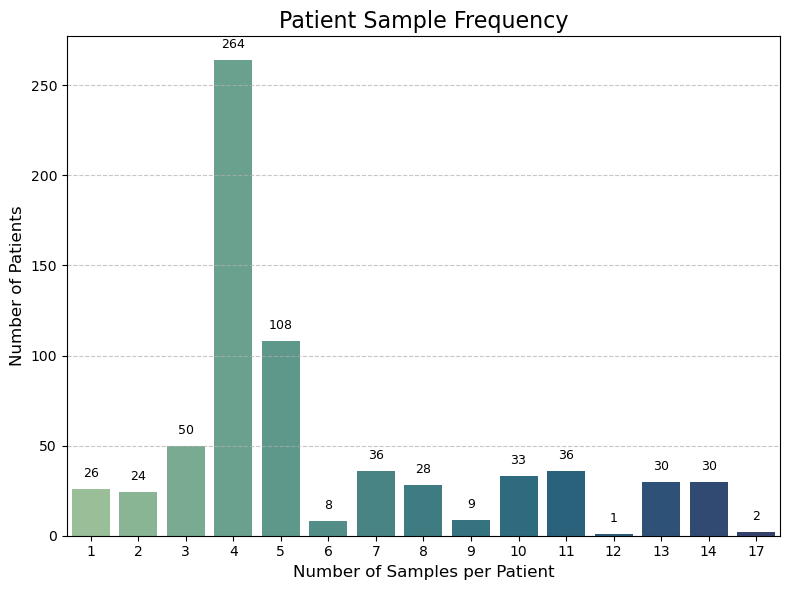

In [7]:
# Count number of samples per patient
sample_counts = hys['PATNO'].value_counts()
counts_distribution = sample_counts.value_counts().sort_index()
print(len(hys))
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")

plt.title("Patient Sample Frequency", fontsize=16)
plt.xlabel("Number of Samples per Patient", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add exact counts on top of bars
for i, val in enumerate(counts_distribution.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [8]:
print("Unique in genedata:", genedata[['PATNO', 'EVENT_ID']].drop_duplicates().shape[0])
print("Unique in hys:", hys[['PATNO', 'EVENT_ID']].drop_duplicates().shape[0])

Unique in genedata: 2738
Unique in hys: 2738


### Filtered Gene Data

/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_93778/684039162.py:2: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'/MDS-UPDRS_Part_III_03Jun2025.csv')


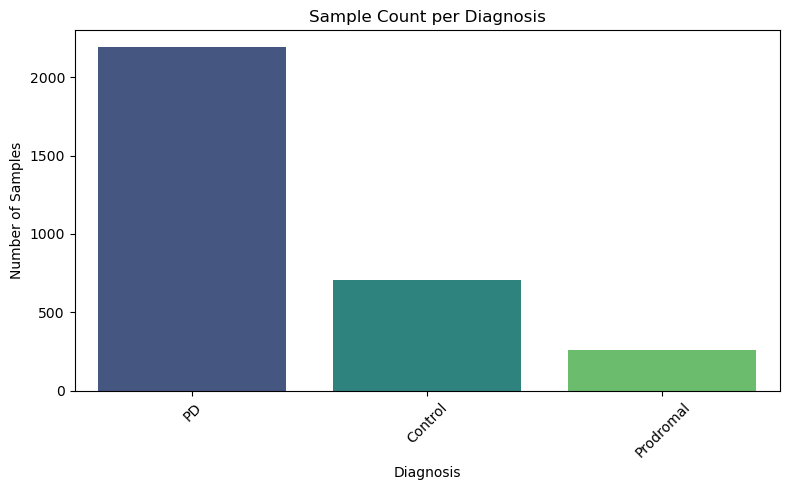

Whole gene_expression metadata Length: 33258 
 Filtered gene expression length 3161


In [10]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Diagnosis_History_UPDRS_HYS/'
df = pd.read_csv(path+'/MDS-UPDRS_Part_III_03Jun2025.csv')

diagnosis_counts = genedata['DIAGNOSIS'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Diagnosis', y='Count', data=diagnosis_counts, hue='Diagnosis', palette='viridis')
plt.title('Sample Count per Diagnosis')
plt.ylabel('Number of Samples')
plt.xlabel('Diagnosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print('Whole gene_expression metadata Length:',len(df['NHY']), '\n','Filtered gene expression length', len(genedata['DIAGNOSIS']))

3161


/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_93778/246882676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")


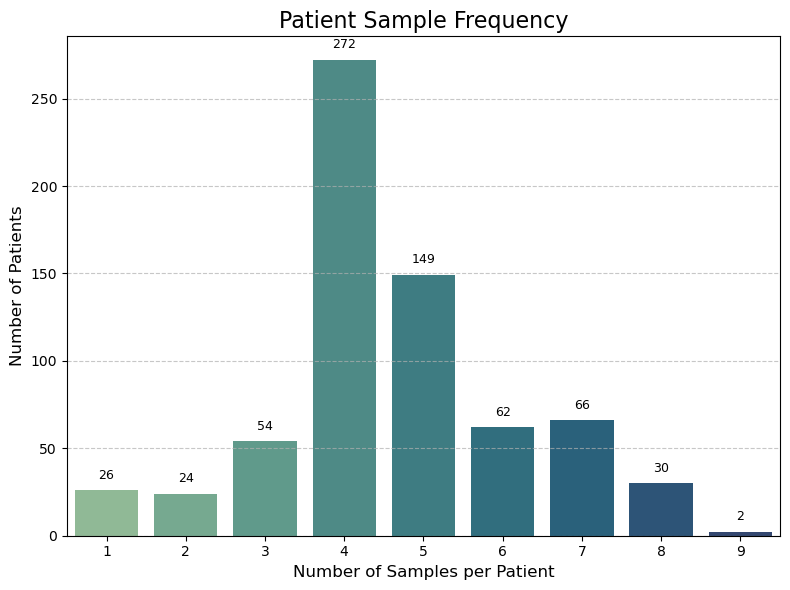

In [11]:
sample_counts = genedata['PATNO'].value_counts()
counts_distribution = sample_counts.value_counts().sort_index()
print(len(genedata))
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts_distribution.index, y=counts_distribution.values, palette="crest")

plt.title("Patient Sample Frequency", fontsize=16)
plt.xlabel("Number of Samples per Patient", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optional grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add exact counts on top of bars
for i, val in enumerate(counts_distribution.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### Loading the relevant gene expressions  
[Step 1. Picked the first 50 important genes for Parkinson's based on score](https://www.genecards.org/Search/Keyword?queryString=parkinson&geneCategories=ProteinCoding&pageSize=25&startPage=1&sort=Score&sortDir=Descending)

[Step 2. Converted the gene IDs to Ensembl Gene IDs](https://www.ensembl.org/biomart/martview/874c5c94e48cf57f0a02586c0cedd6d8)

##### This block is for making the csv file for the cleaned data

In [2]:
#instiantiate the reading class
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/'

input_path = path
output_path = path + 'fomatted_data'
data = ReadData(data_path=input_path, output_path=output_path, write_csv=1)

genedata,unmatchedkeys = data.gene_expression()

/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/read_Parkinsonpredict.py:76: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HYS_data = pd.read_csv(HYS_data_path+"MDS-UPDRS_Part_III_03Jun2025.csv")


1882


/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/read_Parkinsonpredict.py:151: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_counts_df = pd.concat([gene_counts_df, pd.DataFrame([my_row], columns=gene_counts_df.columns)], ignore_index=True)


Total matched gene files with valid PATNO/EVENT_ID pairs: 1607


### Visualize the data

Index(['ENSG00000188906', 'ENSG00000185345', 'ENSG00000158828',
       'ENSG00000145335', 'ENSG00000159082', 'ENSG00000116288',
       'ENSG00000116675', 'ENSG00000177628', 'ENSG00000100225',
       'ENSG00000184381'],
      dtype='object')


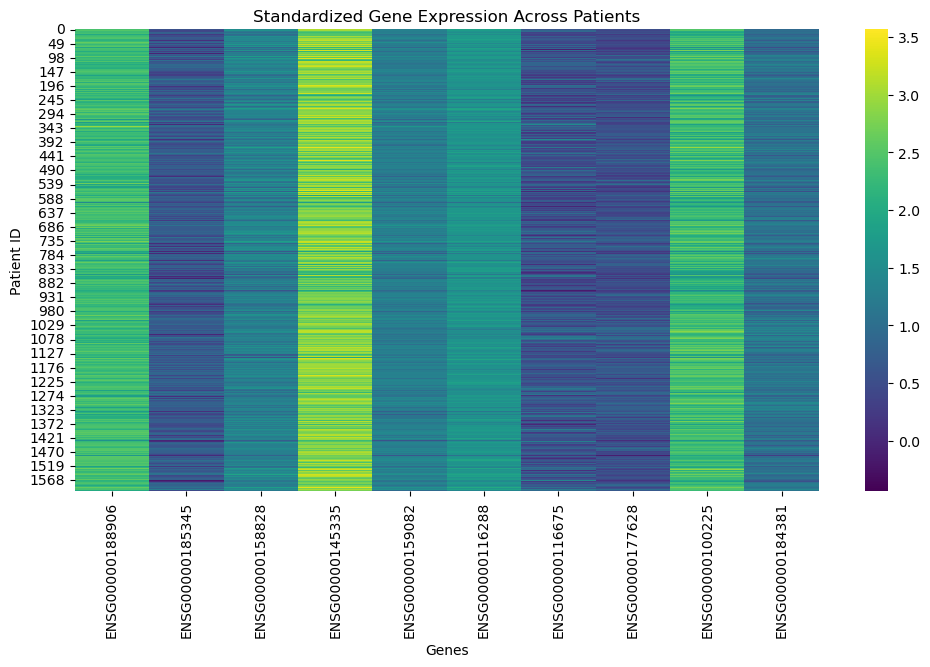

In [16]:
# Just the gene columns
gene_data = genedata.iloc[:,2:-1]
print(gene_data.columns)
# Optional: Normalize if values vary a lot
normalized_data = np.log10(gene_data)

plt.figure(figsize=(12, 6))
sns.heatmap(normalized_data, cmap='viridis', xticklabels=gene_data.columns)
plt.title("Standardized Gene Expression Across Patients")
plt.xlabel("Genes")
plt.ylabel("Patient ID")
plt.show()

### Gene Expression Samples in Phase 1

### Unmerged Dataset

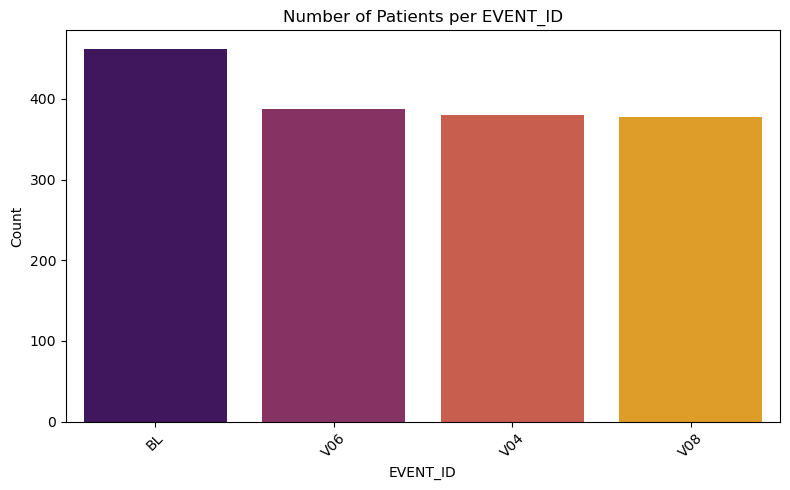

Total samples: 1607


In [23]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/fomatted_data/'

genedata = pd.read_csv(path + 'gene_expression_summary.csv')

event_counts = genedata['EVENT_ID'].value_counts().reset_index()
event_counts.columns = ['EVENT_ID', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='EVENT_ID', y='Count', data=event_counts, hue='EVENT_ID', palette='inferno')
plt.title('Number of Patients per EVENT_ID')
plt.ylabel('Count')
plt.xlabel('EVENT_ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Total samples:", event_counts['Count'].sum())

/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/read_Parkinsonpredict.py:77: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HYS_data = pd.read_csv(HYS_data_path+"MDS-UPDRS_Part_III_03Jun2025.csv")


1882


/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/read_Parkinsonpredict.py:152: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_counts_df = pd.concat([gene_counts_df, pd.DataFrame([my_row], columns=gene_counts_df.columns)], ignore_index=True)


Total matched gene files with valid PATNO/EVENT_ID pairs: 1607


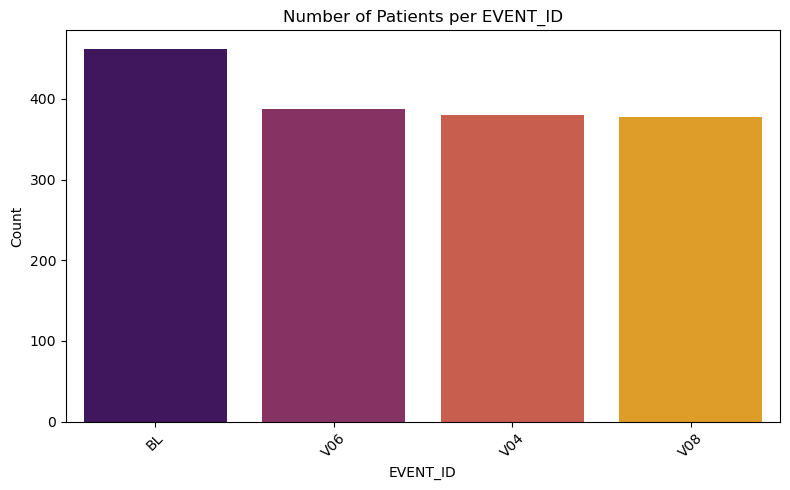

NameError: name 'diagnosis_counts' is not defined

In [6]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/'

input_path = path
output_path = path + 'fomatted_data'
data = ReadData(data_path=input_path, output_path=output_path, write_csv=0)

genedata,unmatchedkeys = data.gene_expression()

event_counts = genedata['EVENT_ID'].value_counts().reset_index()
event_counts.columns = ['EVENT_ID', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='EVENT_ID', y='Count', data=event_counts, hue='EVENT_ID', palette='inferno')
plt.title('Number of Patients per EVENT_ID')
plt.ylabel('Count')
plt.xlabel('EVENT_ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Total samples:", diagnosis_counts['Count'].sum())

### Gene Expression Metadata

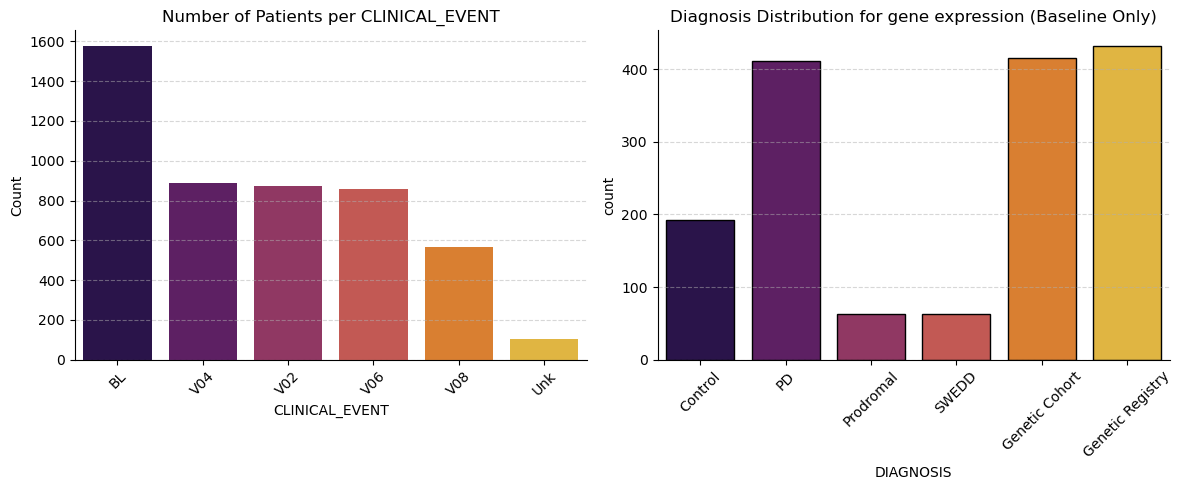

Total samples: 4871


In [33]:
# Load your metadata CSV
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Gene_expression'

df = pd.read_csv(path+'/metaDataIR3.csv')

# Count diagnosis occurrences
diagnosis_counts = df['CLINICAL_EVENT'].value_counts().reset_index()
diagnosis_counts.columns = ['CLINICAL_EVENT', 'Count']
# Filter for BL event
df_bl = df[df['CLINICAL_EVENT'] == 'BL']

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x='CLINICAL_EVENT', y='Count', data=diagnosis_counts, hue='CLINICAL_EVENT', palette='inferno', ax = ax[0])
sns.countplot(data=df_bl, x='DIAGNOSIS', hue='DIAGNOSIS', palette='inferno', edgecolor='black', ax = ax[1])

ax[0].set_title('Number of Patients per CLINICAL_EVENT')
ax[1].set_title('Diagnosis Distribution for gene expression (Baseline Only)')

ax[0].set_ylabel('Count')
ax[0].set_xlabel('CLINICAL_EVENT')
ax[0].tick_params(axis='x', rotation=45)

ax[1].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
ax[1].grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

print("Total samples:", diagnosis_counts['Count'].sum())

### Checking the Genetic Cohort

/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_97831/3241662287.py:2: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path1+'/MDS-UPDRS_Part_III_03Jun2025.csv')
/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_97831/3241662287.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_unique, x='NHY', palette='inferno', edgecolor='black')


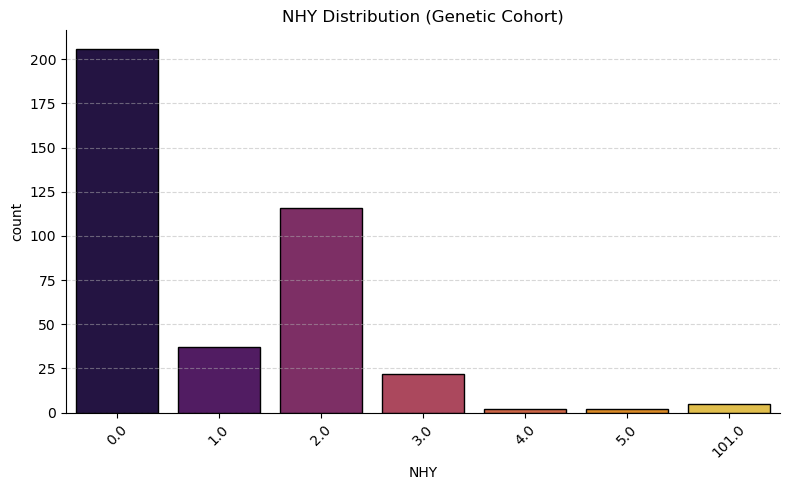

Total Counts: 415


In [7]:
path1 = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Diagnosis_History_UPDRS_HYS/'
df1 = pd.read_csv(path1+'/MDS-UPDRS_Part_III_03Jun2025.csv')
# Load your metadata CSV
path2 = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/Gene_expression'
df2 = pd.read_csv(path2+'/metaDataIR3.csv')

df_bl = df2[(df2['CLINICAL_EVENT'] == 'BL') & (df2['DIAGNOSIS'] == 'Genetic Cohort')]
patno_bl = set(df_bl['PATNO'])
patno_other = set(df1['PATNO'])

common_patnos = patno_bl.intersection(patno_other)

df_common = df1[df1['PATNO'].isin(common_patnos)]
df_unique = df_common.sort_values('ORIG_ENTRY').drop_duplicates(subset='PATNO', keep='last')
# print(df2['DIAGNOSIS'].unique())
# print(df1.columns)
# print(len(common_patnos), "common patients")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.countplot(data=df_unique, x='NHY', palette='inferno', edgecolor='black')
plt.title('NHY Distribution (Genetic Cohort)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()
print('Total Counts:', len(df_unique['NHY']))

### Phase I Gene data merged

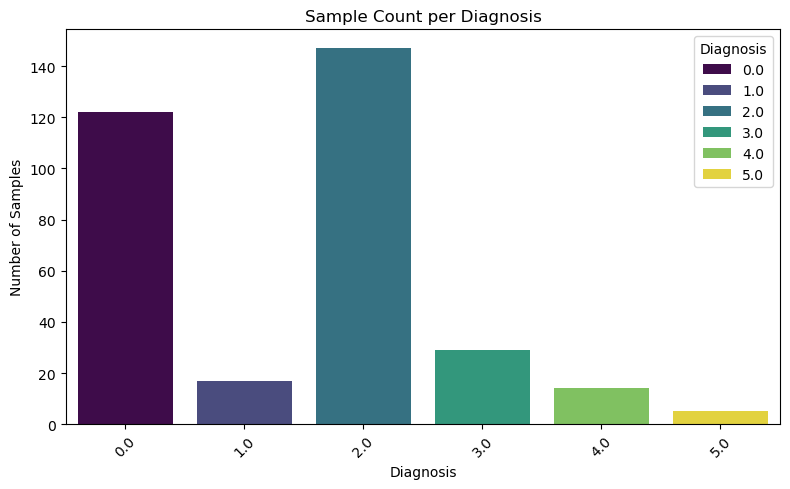

In [8]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/fomatted_data/'
df = pd.read_csv(path+'/merged_all.csv')

diagnosis_counts = df['NHY'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Diagnosis', y='Count', data=diagnosis_counts, hue='Diagnosis', palette='viridis')
plt.title('Sample Count per Diagnosis')
plt.ylabel('Number of Samples')
plt.xlabel('Diagnosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gene Expression Phase I and Phase II combined

This block is for writing the csv file

In [3]:
#instiantiate the reading class
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/'

input_path = path
output_path = path + 'test'
data = ReadData(data_path=input_path, output_path=output_path, write_csv=1)

genedata_all,unmatchedkeys = data.gene_expression_allphases()

/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/read_Parkinsonpredict.py:168: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HYS_data = pd.read_csv(HYS_data_path+"MDS-UPDRS_Part_III_03Jun2025.csv")


4756


/Users/pushpita/Documents/Erdos_bootcamp/our_project/code_repo/notebooks/../src/read_Parkinsonpredict.py:255: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gene_counts_df = pd.concat([gene_counts_df, pd.DataFrame([my_row], columns=gene_counts_df.columns)], ignore_index=True)


Total matched gene files with valid PATNO/EVENT_ID pairs: 3710


### Number of samples in each group in the gene expression data

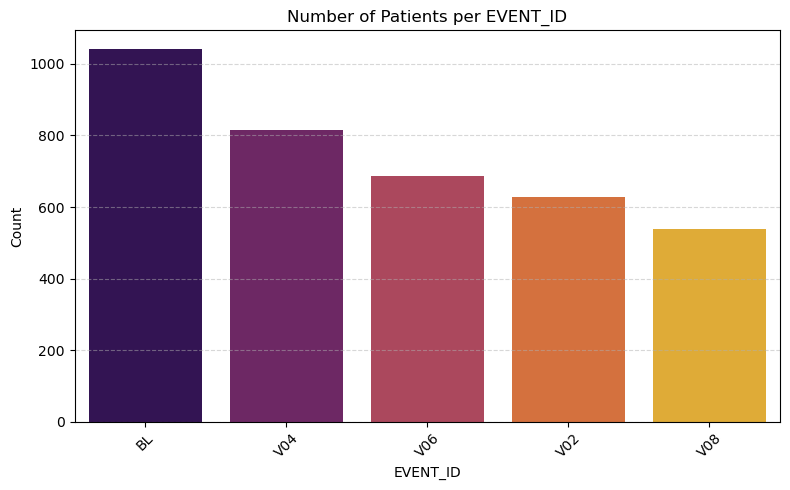

Total samples: 3710


In [47]:

event_counts = genedata_all['EVENT_ID'].value_counts().reset_index()
event_counts.columns = ['EVENT_ID', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='EVENT_ID', y='Count', data=event_counts, hue='EVENT_ID', palette='inferno')
plt.title('Number of Patients per EVENT_ID')
plt.ylabel('Count')
plt.xlabel('EVENT_ID')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("Total samples:", event_counts['Count'].sum())

### Number of Samples in the gene expression and MRI merged dataset

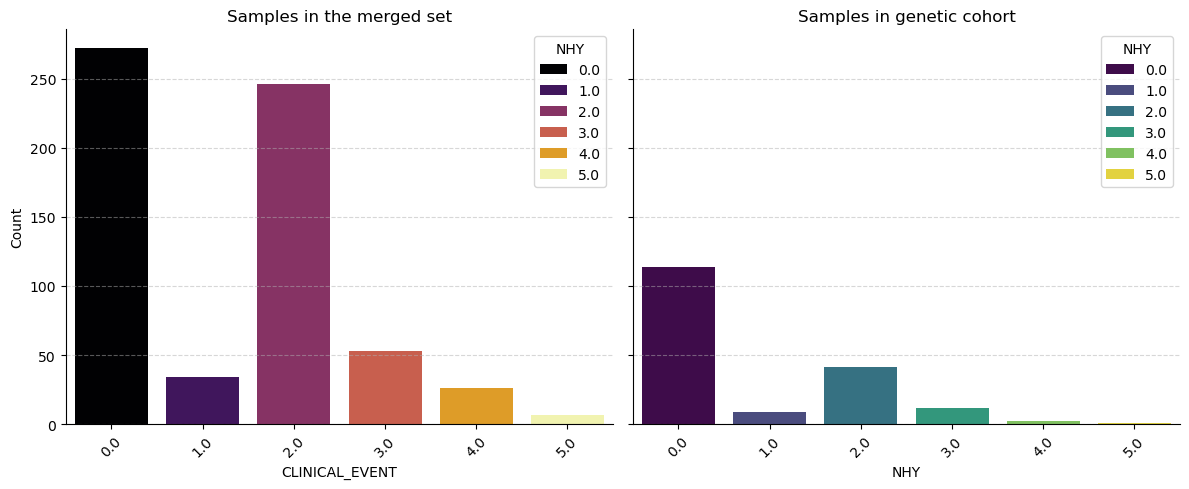

In [46]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/test/'
df = pd.read_csv(path+'/merged_all_phaseI_II_v2.csv')
genetic_cohort = df[df['DIAGNOSIS'] == 'Genetic Cohort']


fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.countplot(data=df, x='NHY', hue='NHY', palette='inferno', ax = ax[0])
sns.countplot(data=genetic_cohort, x='NHY', hue='NHY', palette='viridis', ax = ax[1])

ax[0].set_title('Samples in the merged set')
ax[1].set_title('Samples in genetic cohort')

ax[0].set_ylabel('Count')
ax[0].set_xlabel('CLINICAL_EVENT')
ax[0].tick_params(axis='x', rotation=45)

ax[1].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
ax[1].grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()
